In [13]:
# load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [25]:
# read data
df_article = pd.read_csv('../input/test_5_records.csv', header = 0, names=["id", "article", "words"])
df_article.head()

,id,article,words
0,1,梅雨季來臨，文旦黑點病易發生，請注意病徵，以及早加強防治措施。 5月已進入梅雨季節，近日連續...,"['梅雨季', '來臨', '文旦', '黑點病', '易_發生', '請', '注意', ..."
1,10,天氣多變溫差大，近山區及偏施氮肥田區稻熱病發病較為嚴重，籲請農友注意防治。花蓮區農改場、防檢...,"['天氣', '多變', '溫差', '山區', '偏施_氮肥', '田區', '稻熱病',..."
2,1000,新聞稿-稻熱病進入好發季節，防檢局籲請農友加強防範 行政院農業委員會動植物防疫檢疫局（以下簡...,"['新聞稿', '稻熱病', '進入', '好發_季節', '防檢局', '籲請_農友', ..."
3,1005,稻熱病進入好發季節，防檢局籲請農友加強防治 農委會防檢局表示，自3月起全國各地水稻生長陸續進...,"['稻熱病', '進入', '好發_季節', '防檢局', '籲請_農友_加強', '防治'..."
4,1007,乍暖還寒，防檢局籲請農友加強防治稻熱病 農委會防檢局表示，全國各地水稻生長陸續進入分蘗期，因...,"['乍暖還寒', '防檢局', '籲請_農友_加強', '防治', '稻熱病', '農委會'..."


In [26]:
# Methods-1: using TF-IDF transformer
vectorizer = CountVectorizer()
transformer = TfidfTransformer()
X = vectorizer.fit_transform(df_article.words)
tfidf = transformer.fit_transform(X)
weight = tfidf.toarray()

In [27]:
print(weight.shape)
print(tfidf[0])
print(weight[0])

(5, 404)
  (0, 403)	0.22038503211185187
  (0, 393)	0.11019251605592593
  (0, 389)	0.11019251605592593
  (0, 387)	0.15752197294983902
  (0, 382)	0.11019251605592593
  (0, 381)	0.11019251605592593
  (0, 380)	0.11019251605592593
  (0, 373)	0.11019251605592593
  (0, 370)	0.08890262812541998
  (0, 369)	0.1475944244942379
  (0, 367)	0.22038503211185187
  (0, 360)	0.11019251605592593
  (0, 348)	0.11019251605592593
  (0, 337)	0.062080541429102964
  (0, 331)	0.11019251605592593
  (0, 328)	0.08890262812541998
  (0, 295)	0.11019251605592593
  (0, 278)	0.11019251605592593
  (0, 273)	0.062080541429102964
  (0, 254)	0.11019251605592593
  (0, 252)	0.11019251605592593
  (0, 242)	0.11019251605592593
  (0, 238)	0.062080541429102964
  (0, 233)	0.11019251605592593
  (0, 220)	0.11019251605592593
  :	:
  (0, 184)	0.11019251605592593
  (0, 163)	0.11019251605592593
  (0, 161)	0.07379721224711895
  (0, 159)	0.062080541429102964
  (0, 144)	0.08890262812541998
  (0, 143)	0.11019251605592593
  (0, 129)	0.11019251

In [33]:
# Methods-2: using TF-IDF vectorizer
tfidf_vect = TfidfVectorizer(max_features=30)
words_counts = tfidf_vect.fit_transform(df_article.words)

tfidf_vect.get_feature_names()[10:20]

['田間', '病害', '病徵', '病斑', '發生', '發病', '發病_初期', '稻熱病', '稻穗', '穀粒']

In [34]:
import plotly.graph_objs as go
import plotly.offline as pof

# set offline
pof.init_notebook_mode(connected = True)
# set graph data
data = [go.Bar(x=np.array(tfidf_vect.get_feature_names()),
               y=np.array(words_counts.sum(axis=0)[0]).flatten())]

# add a graph title and x-axis is categorical data
layout = go.Layout(title="Word Frequency for Top 30 in first 5 records", xaxis=dict(type='category'))

# plot the figure
fig = go.Figure(data=data, layout=layout)
pof.iplot(fig)

For Github to show the figure
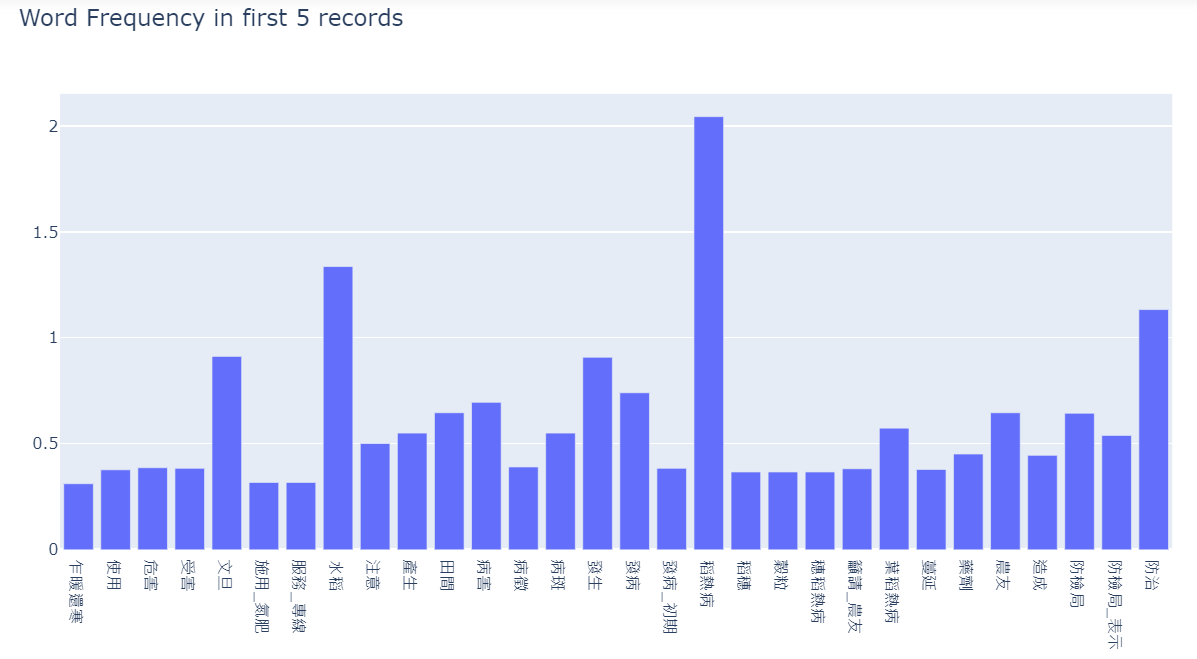